# PIMA Dataset Prediction Modelling with KERAS (~80%)
---

Implement a Deep Neural Network with KERAS on the Pima Indians Diabetes Database (https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from __future__ import print_function
import tensorflow as tf
from six.moves import range
import numpy as np
import os
import sys

from IPython.display import display, Image
import matplotlib.pyplot as plt
# Config the matlotlib backend as plotting inline in IPython
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow import keras
from keras import models, layers, losses, optimizers, metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

## Data Preprocessing

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Splitting into training and testing datasets

X = df.drop(['Outcome'], axis=1)
Y = df['Outcome']
# print( len( Y[] )
y_1 = len(df[df.Outcome == 1])
y_0 = len(df.Outcome) - y_1
print(y_0, y_1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

500 268


---

## Data Visualization

*I have used the following kernel as reference for Data Visualizations - ML From Scratch-Part 2 by I, Coder *

We first plot a 'histogram' of all data as-is.

In [5]:
# X.hist(figsize=(16,9), edgecolor="black", bins=20)

Now, we plot the histogram of the Diabetic Outcomes

In [6]:
# # Diabetic Outcomes
# x_aff = df[df['Outcome']==1]
# x_aff.hist(figsize=(16,9), edgecolor="black", bins=20)

Next, we plot the Pair Plots - A plot of all variables against the each other to get an idea about the distribution of diabetic and non-diabetic trend.

In [7]:
# sns.pairplot(df, hue='Outcome', markers=['o', 'x'], diag_kind='kde')

---

## Data Scaling

We scale the data so as to increase the model accuracy.

In [8]:
scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

---

## KERAS DATA MODEL

We will use the following parameters in our implementation -

* Hidden Layers - 3 , each consisiting of 8 neurons.
* Activation - RELU for hidden, SOFTMAX for output layer.
* Optimizer - SGD
* Learning Rate Decay - 0.01
* L2 Regularization


In [9]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = np.load('data/' + ID + '.npy')

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)
    
    

In [10]:
# Create Keras DNN Model

model = models.Sequential()

# Hyperparameters
hold_prob = 0.01
beta = 1e-8
alpha = 0.05
lr_decay = 0.01
iterations = 50
# iterations = 400

validation_split = 0.5
opt_momentum = 0.9 # (Use only for SGD)
batch_size = 64

# Optimizer
opt = tf.keras.optimizers.SGD(lr=alpha, decay=lr_decay, momentum=opt_momentum, nesterov=True)

# First Layer
model.add(layers.Dense(input_dim=8, units=8, activation='relu'))

# Hidden Layers
model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

# Output Layer
model.add(layers.Dense(units=2, activation='softmax'))

# Compiling the Model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])




###################################################################3
# First Layer
model1.add(layers.Dense(input_dim=8, units=8, activation='relu'))

# Hidden Layers
model1.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model1.add(layers.Dropout(hold_prob))

model1.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model1.add(layers.Dropout(hold_prob))

model1.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model1.add(layers.Dropout(hold_prob))

# Output Layer
model1.add(layers.Dense(units=2, activation='softmax'))

# Compiling the Model
model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])




C:\Users\Sriph\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
def eval_ratios(sx_train_g, sx_train_b, y_train_g, y_train_b, model):
    test_g = model.test_on_batch(sx_train_g,y_train_g)
    test_b = model.test_on_batch(sx_train_b,y_train_b)
    return 1-test_g[1] + 0.1, 1-test_b[1] + 0.1

import math
# Train
train_error_hist = list()
test_error_hist = list()
test_acc_hist = list()

itr = 0
n_batches = math.ceil(len(scaled_x_train) / batch_size)


ratio_g = 1
ratio_b = 1
best_model = model
best_acc = 0.1
best_index = 0

# sample_weight = np.random.rand(len(X_train_g[0]))

while itr < 100:
    
    if itr%5 == 0:
        print(itr)
    
    ptr_g = 0
    ptr_b = 0

    allot_num_g = 1
    allot_num_b = 1

    for i in range(n_batches):
        
        allot_num_g = ( ratio_g / (ratio_g + ratio_b) )*batch_size
        allot_num_g = (int)(allot_num_g)
        allot_num_b = batch_size - allot_num_g

        X_batch = sx_train_g[ ptr_g: ptr_g+allot_num_g ]
        tempp = sx_train_b[ ptr_b: ptr_b+allot_num_b]

        X_batch = np.concatenate([X_batch, tempp])
        

        y_batch = y_train_g[ ptr_g: ptr_g+allot_num_g]
        tempp = y_train_b[ ptr_b: ptr_b+allot_num_b]
        
        y_batch = pd.concat([y_batch, tempp])
        
#         print(ptr_g, ptr_b, allot_num_g, allot_num_b)
#         print(len(y_batch[y_batch==1]),len(y_batch[y_batch==0])  )

#         print(i,"--------------------------------------------------------------")
#         print(X_batch)
#         print(i,"--------------------------------------------------------------")
#         print(y_batch)
#         y_batch = np.concatenate((y_batch, tempp), axis=0 )
        
#         X_batch = scaled_x_train[i*batch_size:(i+1)*batch_size]
#         y_batch = y_train[i*batch_size:(i+1)*batch_size]
        
        loss = model.train_on_batch(X_batch, y_batch)
#         print(model.layers[0].weights)
        train_error_hist.append(loss[0])
        
        loss1 = model.test_on_batch(scaled_x_test, y_test)
#         test_error_hist.append(loss1[0])
#         test_acc_hist.append(loss1[1])
        if loss1[1] > best_acc:
            best_model = model
            best_index = itr*n_batches+i
            
        ratio_g, ratio_b = eval_ratios(sx_train_g, sx_train_b, y_train_g, y_train_b, model)
#         ratio_g = 1
#         ratio_b = 1
        print(ratio_g, ratio_b)
        ptr_b+=allot_num_b
        ptr_g+=allot_num_g
    loss1 = model.test_on_batch(scaled_x_test, y_test)
    test_error_hist.append(loss1[0])
    test_acc_hist.append(loss1[1])
    itr = itr+1

# model.fit(x=scaled_x_train, y=y_train, epochs=iterations, validation_split=validation_split, batch_size=batch_size)



In [11]:
print(len(scaled_x_train))
print(scaled_x_train[535:600])
# for i in range(5):
#     print(i)

537
[[0.29411765 0.57788945 0.62295082 0.         0.         0.46497765
  0.12573099 0.45098039]
 [0.52941176 0.65326633 0.57377049 0.         0.         0.50968703
  0.27631579 0.47058824]]


In [12]:
print( type(scaled_x_train), type(y_train))
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))
print(len(y_train))
print(type(y_train))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
187
350
537
<class 'pandas.core.series.Series'>


In [13]:
xtg = scaled_x_train[ y_train==0 ]
xtb = scaled_x_train[ y_train==1 ]
ytg = y_train[ y_train==0]
ytb = y_train[ y_train==1]

# print(scaled_x_train)
# print(y_train)
# print(xtg)
# print(xtb)
# print(ytg)
print(type(scaled_x_train))


<class 'numpy.ndarray'>


In [14]:
import math
# Train
train_error_hist1 = list()
test_error_hist1 = list()
test_acc_hist1 = list()

itr = 0
n_batches = math.ceil(len(scaled_x_train) / batch_size)


while itr < 100:
    for i in range(n_batches):
        X_batch = scaled_x_train[i*batch_size:(i+1)*batch_size]
        y_batch = y_train[i*batch_size:(i+1)*batch_size]
#         print(i)
#         print(len(y_batch[y_batch==1]))
    
        loss = model1.train_on_batch(X_batch, y_batch)
        train_error_hist1.append(loss[0])
        loss1 = model1.test_on_batch(scaled_x_test, y_test)
#         test_error_hist.append(loss1[0])
#         test_acc_hist.append(loss1[1])
#     if itr%5==0:
#         print(itr)
    loss1 = model1.test_on_batch(scaled_x_test, y_test)
    test_error_hist1.append(loss1[0])
    test_acc_hist1.append(loss1[1])
    itr = itr+1

# model.fit(x=scaled_x_train, y=y_train, epochs=iterations, validation_split=validation_split, batch_size=batch_size)



0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


In [ ]:
import math
# Train
train_error_hist = list()
test_error_hist = list()
test_acc_hist = list()

itr = 0
n_batches = math.ceil(len(scaled_x_train) / batch_size)


while itr < 100:
    for i in range(n_batches):
        X_batch = scaled_x_train[i*batch_size:(i+1)*batch_size]
        y_batch = y_train[i*batch_size:(i+1)*batch_size]
#         print(i)
#         print(len(y_batch[y_batch==1]))
    
        loss = model1.train_on_batch(X_batch, y_batch)
        train_error_hist.append(loss[0])
        loss1 = model1.test_on_batch(scaled_x_test, y_test)
#         test_error_hist.append(loss1[0])
#         test_acc_hist.append(loss1[1])
    if itr%5==0:
        print(itr)
    loss1 = model1.test_on_batch(scaled_x_test, y_test)
    test_error_hist.append(loss1[0])
    test_acc_hist.append(loss1[1])
    itr = itr+1


**Training Accuracy ~ 80%**

**Validation Accuracy ~ 74%**

---

Let's check how our model performs on new data.

In [15]:
predictions = model.predict(scaled_x_test)
predictions=np.argmax(predictions,axis=1)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       150
           1       0.68      0.73      0.70        81

    accuracy                           0.78       231
   macro avg       0.76      0.77      0.77       231
weighted avg       0.79      0.78      0.79       231



In [1]:
# plt.plot(test_error_hist)
# plt.plot(train_error_hist)
# plt.xlabel("#Iterations")
# plt.ylabel("Total Loss")
# plt.title("Loss vs Number of iterations")
# plt.legend(("Train error", "tet"))

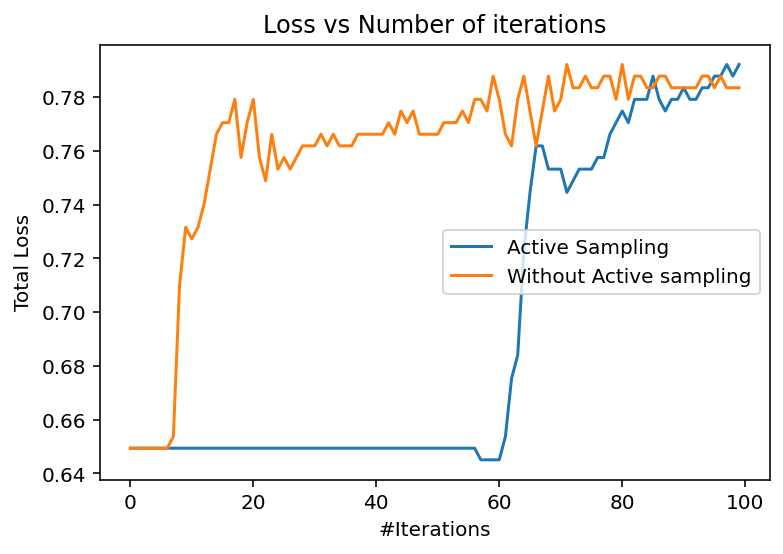

In [23]:
test_as = [0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.649350643157959, 0.6450216174125671, 0.6450216174125671, 0.6450216174125671, 0.6450216174125671, 0.6536796689033508, 0.6753246784210205, 0.6839826703071594, 0.7229437232017517, 0.7445887327194214, 0.761904776096344, 0.761904776096344, 0.7532467246055603, 0.7532467246055603, 0.7532467246055603, 0.7445887327194214, 0.7489177584648132, 0.7532467246055603, 0.7532467246055603, 0.7532467246055603, 0.7575757503509521, 0.7575757503509521, 0.7662337422370911, 0.7705627679824829, 0.7748917937278748, 0.7705627679824829, 0.7792207598686218, 0.7792207598686218, 0.7792207598686218, 0.7878788113594055, 0.7792207598686218, 0.7748917937278748, 0.7792207598686218, 0.7792207598686218, 0.7835497856140137, 0.7792207598686218, 0.7792207598686218, 0.7835497856140137, 0.7835497856140137, 0.7878788113594055, 0.7878788113594055, 0.7922077775001526, 0.7878788113594055, 0.7922077775001526]
plt.plot(test_as)
plt.plot(test_acc_hist)
plt.xlabel("#")
plt.ylabel("Total Loss")
plt.title("Loss vs Number of iterations")
plt.legend(("Active Sampling", "Without Active sampling"))

### Conclusion

Thus, with considerable hyperparameter tuning, we can achieve an accuracy of ~76-79% with KERAS, which is a decent accuracy level.

In [18]:
print(model.metrics_names)

['loss', 'accuracy']


In [19]:
loss1 = model.test_on_batch(scaled_x_test, y_test)
print(loss1)

[0.46432191133499146, 0.7835497856140137]


In [20]:
print(np.max(test_acc_hist))

0.7922077775001526


In [21]:
print(test_acc_hist[-1])

0.7835497856140137


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

def myfunc(x):
    if x[0]>x[1]:
        return 0
    return 1

In [36]:
y_pred = model.predict(scaled_x_test)
# print(y_test)
for i in range(len(y_pred)):
    y_pred[i][0] = myfunc(y_pred[i])
# print(y_pred.T[0])
print(classification_report(y_test, y_pred.T[0]))
print(confusion_matrix(y_test, y_pred.T[0]))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       150
           1       0.68      0.73      0.70        81

    accuracy                           0.78       231
   macro avg       0.76      0.77      0.77       231
weighted avg       0.79      0.78      0.79       231

[[122  28]
 [ 22  59]]
